## Installing dependencies

In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
import nltk

# Download the stopwords package
nltk.download('stopwords')

# You can also download other packages like wordnet, punkt, etc.
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Importing libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
import re 

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [8]:
import nltk
import seaborn as sns

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
import pickle

In [12]:
from wordcloud import WordCloud

### Reading dataset and analysis

In [13]:
dataset = pd.read_csv('labeled_data.csv')

In [14]:
dataset.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [15]:
# 0 - hate speech 
# 1 - offensive speech 
# 2 -neither
dataset['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [16]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https?\S+|www\S+","", tweet)  # Corrected regular expression
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)


In [17]:
dataset.tweet = dataset['tweet'].apply(data_processing)

In [18]:
# Dropping duplicate tweets
dataset = dataset.drop_duplicates('tweet')

In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [20]:
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizing(x))


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24217 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24217 non-null  int64 
 1   count               24217 non-null  int64 
 2   hate_speech         24217 non-null  int64 
 3   offensive_language  24217 non-null  int64 
 4   neither             24217 non-null  int64 
 5   class               24217 non-null  int64 
 6   tweet               24217 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [22]:
dataset['class'].value_counts()

class
1    18743
2     4089
0     1385
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

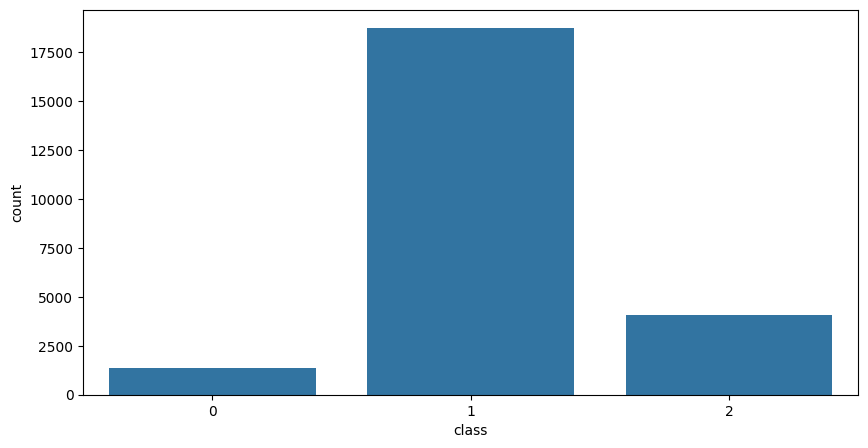

In [23]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='class', data = dataset)

In [24]:
vect=TfidfVectorizer(ngram_range=(1,3)).fit(dataset['tweet'])

In [25]:
X = dataset['tweet']

In [26]:
y = dataset['class']

In [27]:
X = vect.transform(X)

In [28]:
print(len(y))

24217


In [29]:
X

<24217x295098 sparse matrix of type '<class 'numpy.float64'>'
	with 524409 stored elements in Compressed Sparse Row format>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train.size

419916

In [32]:
y_train.size

19373

In [33]:
X_test.size

104493

In [34]:
y_test.size

4844

In [35]:
print(X)

  (0, 14889)	0.11235537650590717
  (0, 15234)	0.20542965024470064
  (0, 15235)	0.21376223954218362
  (0, 15749)	0.09193241472605833
  (0, 16493)	0.21376223954218362
  (0, 16494)	0.21376223954218362
  (0, 58745)	0.1880170913288808
  (0, 58746)	0.20542965024470064
  (0, 58747)	0.21376223954218362
  (0, 61529)	0.15952778034839787
  (0, 61547)	0.21376223954218362
  (0, 61548)	0.21376223954218362
  (0, 130314)	0.12894676437945568
  (0, 130326)	0.19951758405194214
  (0, 130328)	0.21376223954218362
  (0, 164697)	0.1002103478906997
  (0, 164726)	0.21376223954218362
  (0, 164727)	0.21376223954218362
  (0, 214802)	0.04602565890361693
  (0, 223098)	0.18527292856170066
  (0, 223104)	0.21376223954218362
  (0, 234267)	0.15743607535993864
  (0, 234276)	0.21376223954218362
  (0, 234277)	0.21376223954218362
  (0, 251345)	0.11162912800576877
  :	:
  (24216, 60491)	0.17818679126239684
  (24216, 60492)	0.17818679126239684
  (24216, 68486)	0.17818679126239684
  (24216, 68487)	0.17818679126239684
  (24216, 

## Model 1 - Logistic regression

In [36]:
logreg = LogisticRegression(max_iter = 300)
logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=300)

In [37]:
logreg_predict = logreg.predict(X_test) #predicting the value for test data


In [38]:
logreg_acc = accuracy_score(logreg_predict,y_test)

In [39]:
print("Test accuracy: {:.2f}%".format(logreg_acc*100)) 

Test accuracy: 84.64%


In [40]:
print(classification_report(y_test, logreg_predict))

              precision    recall  f1-score   support

           0       0.59      0.06      0.11       278
           1       0.85      0.98      0.91      3750
           2       0.86      0.49      0.62       816

    accuracy                           0.85      4844
   macro avg       0.76      0.51      0.55      4844
weighted avg       0.83      0.85      0.82      4844



## Model 2 - Support Vector Machine

In [41]:
from sklearn import svm

In [42]:
clf = svm.SVC()

In [43]:
clf.fit(X_train, y_train)

SVC()

In [44]:
results = clf.predict(X_test)

In [45]:
svm_acc = accuracy_score(results,y_test)
svm_acc

0.8466143682906688

## Model 3 - K nearest neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
neigh = KNeighborsClassifier(n_neighbors=7)

In [48]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
neight_result = neigh.predict(X_test)

In [50]:
neigh_acc = accuracy_score(neight_result,y_test)
neigh_acc

0.8261767134599505

## Model 4 - SGD Classifier

In [51]:
from xgboost import XGBClassifier

In [52]:
xg = XGBClassifier(random_state=0)


In [53]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
xg_pred = xg.predict(X_test)

In [55]:
xg_accuracy = accuracy_score(xg_pred, y_test)
xg_accuracy

0.8926507018992568

## Model 5 - Random Forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfg = RandomForestClassifier(max_depth = 4, random_state = 0)

In [58]:
rfg.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [59]:
rfg_pred = rfg.predict(X_test)

In [60]:
rfg_score = accuracy_score(rfg_pred, y_test)
rfg_score

0.7741535920726672

## Testing on random data

In [61]:
tweet_test = "i need to survive this semester to actually make a difference. what do yall think hceijfeiof efeifjeiofjef efheifhiefhef efehfiehfe fefiehfiehf efiehfeihfief ebfiefiefhef"
tweet_preproce = data_processing(tweet_test)
tweet_vector = vect.transform([tweet_test])


In [62]:
prediction = logreg.predict(tweet_vector)


In [63]:
prediction[0]

1

## Exporting the model

In [64]:
pickle.dump(xg, open('model.pkl', 'wb'))

PermissionError: [Errno 13] Permission denied: 'model.pkl'

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
ans = pickled_model.predict(X_test)
accuracy = accuracy_score(ans, y_test)
accuracy

0.8926507018992568